In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import transformations as tf
import matplotlib.pyplot as plt

In [2]:
keyframes = pd.read_csv('data/keyframes.txt', sep=' ')
objects = pd.read_csv('data/objects.txt', sep=' ')
apriltags = pd.read_csv('data/result.csv', sep=',')

In [4]:
np.array(objects[['x','y','z', 'qx', 'qy', 'qz', 'qw']].iloc[0])

array([ 0.540652, -0.267039,  1.774773,  0.544521, -0.382815,  0.389875,
        0.636354])

In [5]:
apriltags

,kf_id,x,y,z,qx,qy,qz,qw
0,32,0.031454,0.106185,0.619741,-0.614703,-0.003234,0.018783,0.788528
1,34,0.028707,0.089085,0.631505,-0.604011,-0.005898,0.017879,0.796754
2,33,0.029153,0.093971,0.629016,-0.610325,-0.005049,0.018060,0.791929
3,30,0.031184,0.106318,0.612667,-0.621733,-0.003091,0.018605,0.783002
4,29,0.030278,0.108654,0.610902,-0.628520,-0.004221,0.018710,0.777557
5,35,0.027164,0.083518,0.636193,-0.590754,-0.006017,0.016289,0.806665
6,31,0.031966,0.105993,0.617132,-0.615396,-0.003084,0.019320,0.787975


In [33]:
keyframes[keyframes['id'] == 32]

,id,stamp,x,y,z,qx,qy,qz,qw
32,32,1.573113e+09,-0.014717,-0.13704,-0.014468,-0.147723,0.013993,-0.016366,0.988794


In [3]:
# (x, y, z, qx, qy, qz, qw)
def _get_tf_mat_from_row(drow):
    q = np.array(drow[['qw', 'qx', 'qy', 'qz']])
    t = np.array(drow[['x', 'y', 'z']]).reshape(3)
    T = tf.quaternion_matrix(q)
    T[:3, 3] = t
    return T

def add_tf_mat_to_df(df):
    df['T'] = df.apply(_get_tf_mat_from_row, axis=1)

In [4]:
add_tf_mat_to_df(keyframes)
add_tf_mat_to_df(objects)
add_tf_mat_to_df(apriltags)     

In [9]:
keyframes['T'].iloc[1]

array([[ 9.99999213e-01, -4.38893946e-04, -1.17573196e-03,
         2.36100000e-04],
       [ 4.29899552e-04,  9.99970727e-01, -7.63939857e-03,
         1.17000000e-05],
       [ 1.17905042e-03,  7.63888710e-03,  9.99970128e-01,
         3.47000000e-05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [71]:
objects

,label,x,y,z,qx,qy,qz,qw,sx/2,sy/2,sz/2,T,Tao
0,56,0.540652,-0.267039,1.774773,0.544521,-0.382815,0.389875,0.636354,0.814805,0.227521,0.435776,"[[0.4028999456836056, -0.9130992176020576, -0....","[[0.40349838950400646, -0.0022704612901459937,..."
1,56,0.457131,-0.213848,1.595002,0.548507,-0.377081,0.383178,0.640410,0.888122,0.227652,0.366977,"[[0.42196928609470913, -0.904444858850834, -0....","[[0.422596054388842, -0.0022489418471797716, -..."
2,56,-0.774559,-0.190629,2.601454,0.382706,-0.544597,0.582340,0.466723,1.914112,0.354646,0.482442,"[[-0.2714115243540708, -0.9604240137930702, -0...","[[-0.27181466302727086, -0.0023881364734605966..."
3,56,0.511861,-0.105626,1.206638,0.473429,-0.460289,0.258161,0.705231,0.712112,-0.046826,0.096397,"[[0.44297322677723433, -0.7999555248175131, -0...","[[0.4436311930862594, -0.0019891245309643264, ..."
4,60,0.160361,0.164248,1.206429,0.544362,-0.383041,0.390139,0.636193,0.978567,0.405496,0.095983,"[[0.4021425255860611, -0.9134329958386276, -0....","[[0.402739844379314, -0.0022712912443842805, -..."
5,56,-0.735422,-0.226947,2.639421,0.384285,-0.543484,0.580983,0.468411,2.061632,0.460727,0.533976,"[[-0.26583229682357046, -0.9619832205800949, -...","[[-0.2662271484412025, -0.0023920135095866044,..."
6,56,-0.237392,-0.047699,0.911834,0.491614,-0.464603,0.644387,0.356685,0.573185,0.027694,0.060809,"[[-0.26218228361602336, -0.9164978872175467, 0...","[[-0.26257171371927734, -0.002278912231348449,..."
7,56,-0.690146,-0.246843,2.529038,0.401006,-0.531267,0.566131,0.486257,1.625238,0.384402,0.529658,"[[-0.20549712566882983, -0.9766522303977172, -...","[[-0.20580235898117985, -0.0024284886464760523..."
8,60,0.114167,0.107797,0.829831,0.433856,-0.504797,0.534189,0.521144,0.615073,0.407795,0.061333,"[[-0.08035580174712031, -0.9947972024752805, -...","[[-0.08047515751647225, -0.002473606916121577,..."
9,60,0.160364,0.194634,1.203505,0.555045,-0.367390,0.371872,0.647040,0.874244,0.396159,0.085226,"[[0.4534715579040118, -0.8890681627792263, -0....","[[0.45414511781500844, -0.0022107070173519572,..."


In [60]:
def _get_best_april_tag_pose():
    # TODO -- find tag with least orientation
    tag = apriltags.sample(1)
    kf = keyframes[ keyframes['id'] == tag['kf_id'].iloc[0]]
    # TODO -- check if require inverse
    Twa = kf['T'].iloc[0] * tag['T'].iloc[0]
    return Twa

def add_pose_april_tag(df):
    # Pose from object to apriltag
    Taw = np.linalg.inv(_get_best_april_tag_pose())
    df['Tao'] = df.apply(lambda x: Taw*x['T'], axis=1)


In [62]:
tag = apriltags.sample(1)
kf = keyframes[ keyframes['id'] == tag['kf_id'].iloc[0]]

In [63]:
tag

,kf_id,x,y,z,qx,qy,qz,qw,T
1,34,0.028707,0.089085,0.631505,-0.604011,-0.005898,0.017879,0.796754,"[[0.9992911387250342, -0.021365611646237213, -..."


In [70]:
kf['T'].iloc[0] * tag['T'].iloc[0]

array([[ 9.97918514e-01, -5.46113086e-04, -1.41768341e-03,
        -4.23997493e-04],
       [-1.40606994e-03,  2.53785185e-01,  3.23462252e-01,
        -1.51983153e-02],
       [ 4.20261135e-04,  3.24897944e-01,  2.54244707e-01,
        -1.05104547e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [67]:
kf

,id,stamp,x,y,z,qx,qy,qz,qw,T
34,34,1.573113e+09,-0.01477,-0.170605,-0.016643,-0.170983,0.020353,-0.016509,0.984925,"[[0.9986264018321912, 0.025560376862957916, 0...."


In [25]:
Twa = get_best_april_tag_pose()

array([[ 9.98519585e-01, -6.90595002e-04, -7.65330055e-04,
        -4.22628721e-04],
       [-1.18693823e-03,  2.02366821e-01,  2.45843732e-01,
        -1.39036668e-02],
       [ 2.93410232e-04,  2.46598046e-01,  2.03068439e-01,
        -6.87973551e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [9]:
objects.iloc[0]

label                                                   56
x                                                 0.540652
y                                                -0.267039
z                                                  1.77477
qx                                                0.544521
qy                                               -0.382815
qz                                                0.389875
qw                                                0.636354
sx/2                                              0.814805
sy/2                                              0.227521
sz/2                                              0.435776
T        [[0.4028999456836056, -0.9130992176020576, -0....
Tao      [[0.40349838950400646, -0.0022704612901459937,...
Name: 0, dtype: object

In [93]:
def _get_cuboid_corners(obj):
    sx, sy, sz = obj['sx/2'], obj['sy/2'], obj['sz/2']
    corners = [] 
    corners.append( (sx, sy, sz, 1) )
    corners.append( (-sx, sy, sz, 1) )
    corners.append( (-sx, sy, -sz, 1) )
    corners.append( (sx, sy, -sz, 1) )
    
    corners.append( (sx, -sy, sz, 1) )
    corners.append( (-sx, -sy, sz, 1) )
    corners.append( (-sx, -sy, -sz, 1) )
    corners.append( (sx, -sy, -sz, 1) )
    return np.array(corners)

def get_new_scale_from_Tao_pose(obj):
    # 1. Get cuboid corners in object coord
    sx, sy, sz = obj['sx/2'], obj['sy/2'], obj['sz/2']
    corners = [] 
    corners.append( (sx, sy, sz, 1) )
    corners.append( (-sx, sy, sz, 1) )
    corners.append( (-sx, sy, -sz, 1) )
    corners.append( (sx, sy, -sz, 1) )
    
    corners.append( (sx, -sy, sz, 1) )
    corners.append( (-sx, -sy, sz, 1) )
    corners.append( (-sx, -sy, -sz, 1) )
    corners.append( (sx, -sy, -sz, 1) )
    corners_mat = np.array(corners, dtype=np.float64).transpose()
    # print(corners_mat)
    # 2. transform each corners to apriltag frame
    corners_mat_a = np.matmul(obj['Tao'], corners_mat)[:3, :] 
    print(corners_mat_a)
    # 3. get new scale
    mins = np.min(corners_mat_a, axis=1)
    maxs = np.max(corners_mat_a, axis=1)
    half_scale = (maxs - mins) / 2.0
    # 4. Get cuboid corner projection to apriltag z=0, for viz
    # projected_corners = [], No need, just half_scale in Tao
    return half_scale



In [40]:
get_new_scale_from_Tao_pose(objects.iloc[0])

[[ 0.32848544 -0.32905957 -0.32901786  0.32852715  0.3295186  -0.32802641
  -0.32798471  0.3295603 ]
 [-5.66812993 -5.66605483  5.21181568  5.20974059 -5.18085432 -5.17877923
   5.69909129  5.69701619]
 [ 0.81754997  0.7907241   1.81931345  1.84613931 -1.44917889 -1.47600476
  -0.44741542 -0.42058955]]


array([0.32930993, 5.68361061, 1.66107204])

In [52]:

Twa = _get_best_april_tag_pose()


In [90]:
Tao0 = objects['Tao'][0]

In [92]:
Tao0[:,3]

array([2.50368041e-04, 1.54806797e-02, 1.85067277e-01, 1.00000000e+00])

In [138]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html

In [150]:
def projected_2d_bb_lines(obj):
    # x,z plane on world coordinate
    corners = _get_cuboid_corners(obj).transpose()
    corners_w = np.matmul(obj['T'], corners)[:3, :]
    mins = np.min(corners_w, axis=1)
    maxs = np.max(corners_w, axis=1)
    bb = [(mins[0], mins[2]), (mins[0], maxs[2]), (maxs[0], maxs[2]), (maxs[0], mins[2])]
    lines = np.array([
        bb[0], bb[1], bb[1], bb[2], bb[2], bb[3], bb[3], bb[0]
    ])
    return lines

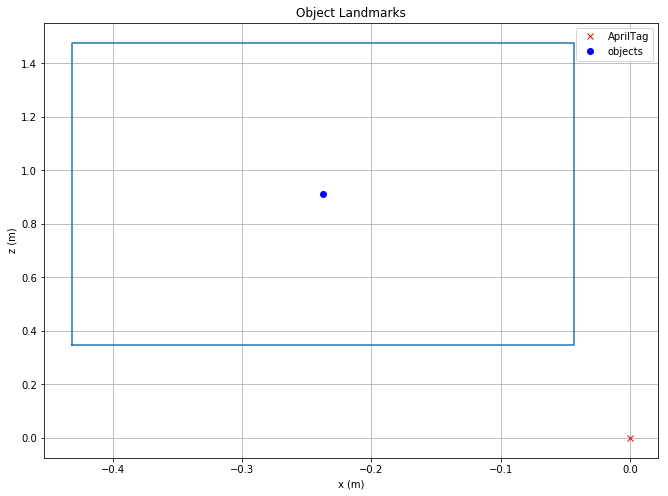

In [152]:
# World frame test
IDX = 6
plt.figure(figsize=(11,8))
plt.ylabel('z (m)')
plt.xlabel('x (m)')
plt.title('Object Landmarks')
plt.grid(True)
plt.plot([Twa[3,0]], [Twa[3,2]], 'rx', label='AprilTag')
# Draw center
plt.plot(objects['x'][IDX], objects['z'][IDX], 'ro', color='b', label='objects')
# Draw approximate projected bbox (not rotated)
lines = projected_2d_bb_lines(objects.iloc[IDX])
plt.plot( lines[:,0], lines[:,1] )

plt.legend()

In [153]:
def build_convex_hull(obj):
    # x,z plane on world coordinate
    corners = _get_cuboid_corners(obj).transpose()
    corners_w = np.matmul(obj['T'], corners)[:3, :].transpose()
    corners2d = np.zeros((corners_w.shape[0],2))
    corners2d[:, 0] = corners_w[:, 0]
    corners2d[:, 1] = corners_w[:, 2]
    hull = ConvexHull(corners2d)
    return hull

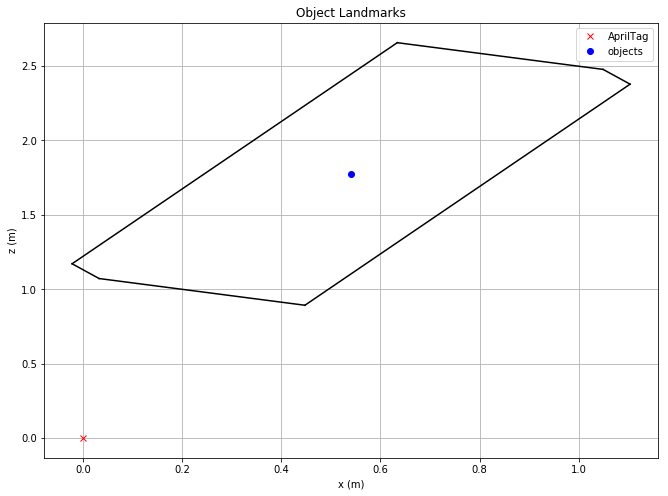

In [155]:
## convex hull method

IDX = 0
plt.figure(figsize=(11,8))
plt.ylabel('z (m)')
plt.xlabel('x (m)')
plt.title('Object Landmarks')
plt.grid(True)
plt.plot([Twa[3,0]], [Twa[3,2]], 'rx', label='AprilTag')
# Draw center
plt.plot(objects['x'][IDX], objects['z'][IDX], 'ro', color='b', label='objects')
# Draw projected cuboid convex hull
hull = build_convex_hull(objects.iloc[IDX])
for simplex in hull.simplices:
    plt.plot(corners2d[simplex, 0], corners2d[simplex, 1], 'k-')
plt.legend()

In [146]:
corners_w.shape 

(8, 3)

In [58]:
# Apriltag frame test

plt.figure(figsize=(11,8))
plt.ylabel('y (m)')
plt.xlabel('x (m)')
plt.title('Object Landmarks')
plt.xlim((-1,1))
plt.grid(True)
plt.plot([Twa[3,0]], [Twa[3,2]], 'rx', label='AprilTag')
# Draw center
plt.plot(objects['x'][:1], objects['z'][:1], marker='rx', color='b', label='objects')
# Draw poly
plt.legend()

array([-4.23997493e-04, -1.51983153e-02, -1.05104547e-02,  1.00000000e+00])

In [86]:
objects['x'][:1]

0    0.540652
Name: x, dtype: float64

In [100]:
corners = _get_cuboid_corners(objects.iloc[0]).transpose()
corners_w = np.matmul(objects['T'].iloc[0], corners)[:3, :] 

In [109]:
mins = np.min(corners_w, axis=1)
maxs = np.max(corners_w, axis=1)

In [111]:
out = (maxs - mins)/2.0

In [106]:
objects.iloc[0]

label                                                   56
x                                                 0.540652
y                                                -0.267039
z                                                  1.77477
qx                                                0.544521
qy                                               -0.382815
qz                                                0.389875
qw                                                0.636354
sx/2                                              0.814805
sy/2                                              0.227521
sz/2                                              0.435776
T        [[0.4028999456836056, -0.9130992176020576, -0....
Tao      [[0.40349838950400646, -0.0022704612901459937,...
Name: 0, dtype: object

In [112]:
out[0] * out[1] * out[2] * 8

2.068171477525597

In [120]:
0.5633 * 0.52012 * 0.88 * 8

2.06260451584

In [113]:
s  = objects[['sx/2', 'sy/2', 'sz/2']].iloc[0]

In [119]:
s[0] * s[1] * s[2] * 8

0.6462915360714983

In [117]:
s

sx/2    0.814805
sy/2    0.227521
sz/2    0.435776
Name: 0, dtype: float64

In [116]:
0.814 * 0.2275 * 0.43577

0.08069806745